<a href="https://colab.research.google.com/github/Palak2506/ML-project/blob/main/Facebook_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
# Step 2: Load the Dataset
df = pd.read_csv('Facebook_Marketplace_data.csv')

In [5]:
# Step 3: Data Cleaning
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], errors='ignore')
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['publish_hour'] = df['status_published'].dt.hour

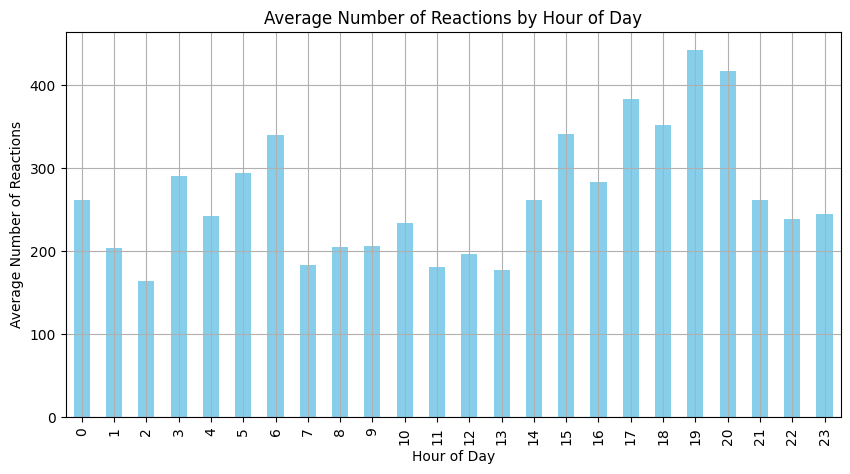

In [6]:
# ========================================
# Question 1: How does time of upload affect num_reactions?
# ========================================
reaction_by_hour = df.groupby('publish_hour')['num_reactions'].mean()
plt.figure(figsize=(10, 5))
reaction_by_hour.plot(kind='bar', color='skyblue')
plt.title('Average Number of Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.grid(True)
plt.show()

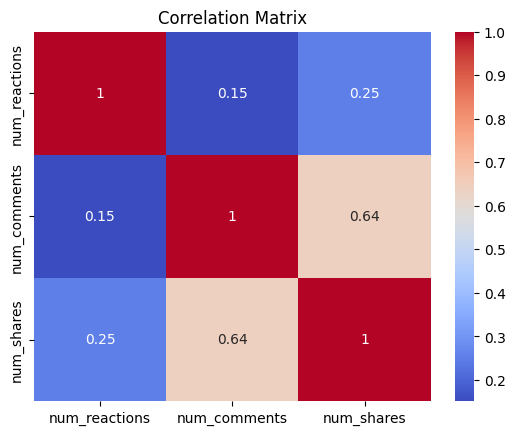

In [7]:
# ========================================
# Question 2: Correlation with comments and shares
# ========================================
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# ========================================
# Question 3: K-Means Clustering
# ========================================
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
            'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

df_encoded = pd.get_dummies(df[features], columns=['status_type'])
df_encoded.fillna(0, inplace=True)

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df['cluster'] = kmeans.labels_


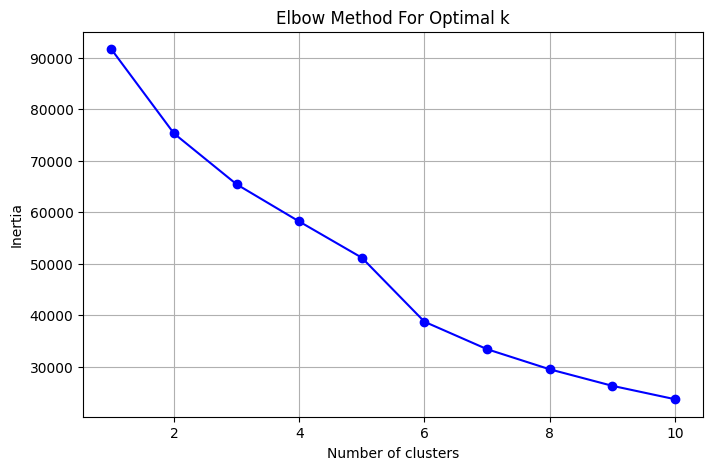

In [9]:
# ========================================
# Question 4: Elbow Method to find optimal k
# ========================================
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [10]:
# ========================================
# Question 5: Count of Different Post Types
# ========================================
post_type_counts = df['status_type'].value_counts()
print("\nPost Type Counts:")
print(post_type_counts)



Post Type Counts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [11]:
# ========================================
# Question 6: Average metrics by post type
# ========================================
avg_metrics_by_type = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("\nAverage Engagement Metrics by Post Type:")
print(avg_metrics_by_type)


Average Engagement Metrics by Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
